# Intro to AI - homework 1

Submitted by: (Bashar Beshoti - 207370248)


*italicized text*

# Vehicle Routing Problem (VRP)

The Vehicle Routing Problem (VRP) is a combinatorial optimization problem that involves the efficient distribution of goods or services from a central depot to a set of geographically dispersed locations using a fleet of vehicles. The goal is to minimize the overall transportation cost, which can include factors such as distance traveled, time, etc.

The problem is defined as follows:

**Given:**


*   **Depot** - A central location where the fleet of vehicles starts and returns after completing their routes.
*   **Locations** - Locations that require goods or services to be delivered.
*   **Transportation cost** - expenses incurred in moving from one location to another, encompassing factors like fuel, vehicle maintenance, labor, and associated logistical expenses.
*   **Constraints** - Various constraints need to be satisfied, such as vehicle capacity constraints (a vehicle cannot exceed its maximum capacity) or window time that the location must be visited.


**Objective:**
Minimize the total cost of the delivery routes



In this assignment we'll focus on VRP with 2 factors of transformation costs - distance and time traveled and no constraints.







## Class VRP

We'll start with defining class VRP - an instance that parses the data file and holds all neccesary data of the VRP and

**task 1.1** - fill in the function *compute_distance_matrix*

**task 1.2** - fill in the function *plot locations*

**task 1.3** - fill in the function *plot_routes*

**task 1.4** - fill in the function *compute_route_distance*

**task 1.5** - fill in the function *compute_route_time*

In [129]:
#import lib
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [130]:
class VRP:
  def __init__(self,file_path):

    self.file_path = file_path  # path to data to initalize vrp
    self.locations = []         # locations holds all x,y coordinates of the locations (including depot)
    self.dim = None             # dim holds the number of locations
    self.dis_mtx = []           # distance matrix - stores the distance from location i to location j
    self.time_mtx =[]           # time matrix - stores the time it takes travel from location i to location j
    self.parse_data_file()
    self.dis_mtx = self.compute_distance_matrix()


  def parse_data_file(self):
    with open(self.file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith('DIMENSION'):
                self.dim = int(line.split(': ')[1])
            elif line == 'NODE_COORD_SECTION':
              for i in range(self.dim):
                  line = next(f)
                  node_id, x, y = line.split()
                  self.locations.append((float(x), float(y)))
              self.locations = np.array(self.locations)
            elif line == 'TIME':
              time_lines = []
              for i in range(self.dim):
                line = next(f)
                time_lines.append(line)
              self.time_mtx = np.array([list(map(float, line.split())) for line in time_lines])


    # ~~~~TODO 1: fill in this method to initialize the distance matrix~~~~
  def compute_distance_matrix(self):
        dis_mtx = np.zeros((self.dim, self.dim))
        for i in range(self.dim):
            for j in range(self.dim):
                dis_mtx[i, j] = np.sqrt((self.locations[i][0] - self.locations[j][0]) ** 2 +
                                        (self.locations[i][1] - self.locations[j][1]) ** 2)
        return dis_mtx


    #~~~~ TODO 2: plot locations ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def plot_locations(self):
    plt.figure(figsize=(8, 6))
    plt.scatter(self.locations[:, 0], self.locations[:, 1], color='blue', label='Locations')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Locations')
    plt.legend()
    plt.grid(True)
    plt.show()
    pass

    # ~~TODO 3: Plot routes, each route hold ordered locations to visit~~~~
    #   Note: Make sure to add depot to the start and end of each route
  def plot_routes(self, routes):
    plt.figure(figsize=(8, 6))
    plt.scatter(self.locations[:, 0], self.locations[:, 1], color='blue', label='Locations')

    for route in routes:
        # Add depot to the start and end of each route
        route_with_depot = [0] + route + [0]
        route_coords = [self.locations[i] for i in route_with_depot]
        route_coords = np.array(route_coords)
        plt.plot(route_coords[:, 0], route_coords[:, 1], marker='o')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Routes')
    plt.legend()
    plt.grid(True)
    plt.show()
  pass

  #~~~ TODO 4: given a route calculate the distance it took to travel~~~~
  def compute_route_distance(self, route):
    distance = 0
    for i in range(len(route) - 1):
        distance += self.dis_mtx[route[i], route[i+1]]
    # Add distance from the last location back to the depot
    distance += self.dis_mtx[route[-1], 0]
    return distance

  # TODO 5: given a route calculate the distance it took to travel~~~~~~
  def compute_route_time(self, route):
    time = 0
    for i in range(len(route) - 1):
        time += self.time_mtx[route[i], route[i+1]]
    # Add time from the last location back to the depot
    time += self.time_mtx[route[-1], 0]
    return time

  def print_routes(self, routes):
    total_time, total_distance = 0, 0
    for i,r in enumerate(routes):
        route_string = "depot ->" + " -> ".join(map(str, r)) + " -> depot"
        print(f"vehicle {i + 1} route: " + route_string)
        r_distance = self.compute_route_distance(r)
        r_time = self.compute_route_time(r)
        print(f"Distance for vehicle {i + 1} {r_distance=}, Time traveled = {r_time}")
        total_time+= r_time
        total_distance += r_distance
    print(f"Total Distance is: {total_distance}, Total Time = {total_time}")




### sanity check: Test your methods
1) Create a folder in google drive and unzip all data instances provided (If running locally - modify this section to load the file)


In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2) Load vrp instance - copy the path to data file (start with example 'E-n5') from the google drive folder you created

In [132]:
#insert path here
path = '/content/drive/MyDrive/HW1-Datasets/Ex1-d5'
vrp = VRP(path)

3) Test plot_location


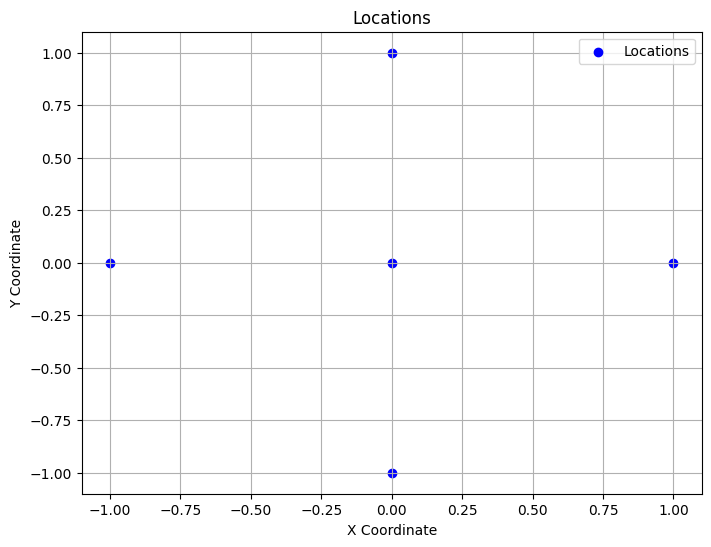

In [133]:
vrp.plot_locations()

4) Test plot_location

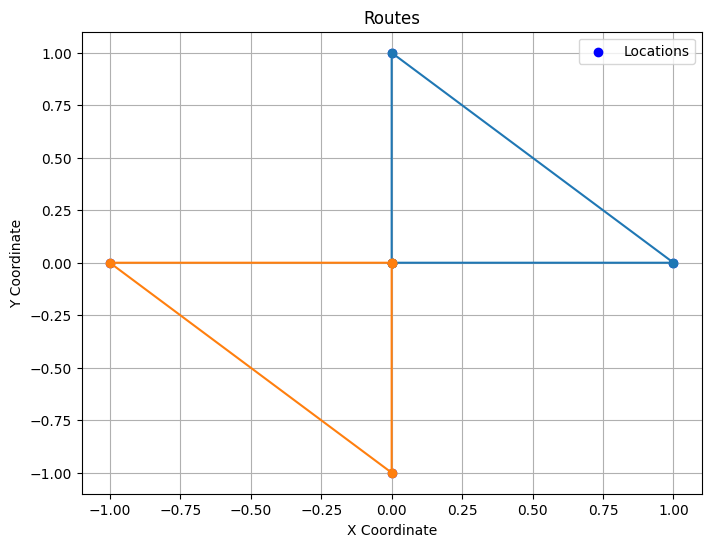

In [134]:
routes = [[1,2],[3,4]]
vrp.plot_routes(routes)

## Particle swarm optimization
Particle swarm optimization (PSO) is one of the bio-inspired algorithms and it is a simple one to search for an optimal solution in the solution space. Each particle adjusts its position and velocity based on its own experience and shared knowledge within the swarm. The algorithm iteratively refines solutions, striking a balance between global exploration and local exploitation.

**pseudocode for Particle Swarm Optimization (PSO):**


1.  Initialization:
  1.   Initialize a swarm of particles with random positions and velocities.
  2.   Initialize personal best positions for each particle as their current positions.
  1.   Initialize the global best position as the best position among all particles.

2.   Main Loop: Repeat until convergence or a maximum number of iterations:
  1.   For each particle in the swarm:
      1.   Evaluate the fitness of the current position.
      2.   If the fitness is better than the personal best -> Update the personal best position.
      2.   If the fitness is better than the global best ->Update the global best position
  1.   Update the velocity and position using the formula: $v_{t+1} = w_{t}v_{t} + c_1  r_1(p_{best,i} - x_i) +c_1 r_1 (g_{best} - x_i)$
  2.   update positions  : $x_{i+1} = x_i + v_{i+1}$
1.   Return global bet position












In [135]:
import multiprocessing

In [136]:
def pso(s, d, lb, ub, c1, c2, maxiter ,obj_func, wupdate_func):
    #:param s: number of particles
    #:param d: dimension of a particle
    #:param lb: lower bound in the search space
    #:param ub: upper bound in the search space
    #:param c1: constant for velocity update
    #:param c2: constant for velocity update
    #:param maxiter: maximum number of iteration defined to run
    #:param obj_func: function to evaluate particle position
    #:param wupdate_func: function to update the velocity weight

    # initialize swarm
    p = np.random.rand(s, d)   # particle positions
    v = np.zeros_like(p)       # particle velocities
    bp = p                     # best particle positions
    f_p = np.zeros(s)          # current particle function values
    f_bp = np.ones(s) * np.inf # best particle function values
    gp = []                    # best swarm position
    f_gp = np.inf              # best swarm position starting value

    # Initialize the particle's position
    p = lb + p * (ub - lb)

    # Initialize the multiprocessing module if necessary
    processes = 5
    mp_pool = multiprocessing.Pool(processes)

    # Calculate objective function
    f_p = np.array(mp_pool.map(obj_func, p))
    f_bp = f_p.copy()

    # Update swarm's best position
    i_min = np.argmin(f_p)
    if f_p[i_min] < f_gp:
        f_g = f_p[i_min]
        gp = p[i_min, :].copy()

    # Initialize the particle's velocity
    v = -1 + np.random.rand(s, d) * 2

    # Iterate until termination criterion met
    it = 1
    print("Running...")
    while it <= maxiter and np.std(f_p)>1:
      r1 = np.random.uniform(size=(s, d))
      r2 = np.random.uniform(size=(s, d))

      # Update the particles velocities
      w = wupdate_func(it)
      v = w * v + c1 * r1 * (bp - p) + c2 * r2 * (gp - p)

      # Update the particles' positions
      p = p + v

      # Correct for bound violations
      maskl = p < lb
      masku = p > ub
      p = p * (~np.logical_or(maskl, masku)) + lb * maskl + ub * masku

      # Update objectives
      f_p = np.array(mp_pool.map(obj_func, p))

      # Store particle's best position
      i_update = (f_p < f_bp)
      bp[i_update, :] = p[i_update, :].copy()
      f_bp[i_update] = f_p[i_update]

      # Compare swarm's best position with global best position
      i_min = np.argmin(f_bp)
      if f_bp[i_min] < f_gp:
          gp = bp[i_min, :].copy()
          f_gp = f_p[i_min]

      it += 1
    print("Finshed run")
    return gp, f_gp

To run the pso provided we need to define two functions:
1. wupdate_func - updating w for velocity computation
2. obj_func - How we evaluate a particle

**Task 2 - Define how we update w in each iteration**

In Particle Swarm Optimization (PSO), w represents the inertia weight. The inertia weight is a parameter used to control the trade-off between exploration and exploitation during the optimization process.

The inertia weight influences the particle's velocity update formula in PSO. The velocity update equation for a particle i in a given iteration is typically defined as follows:

$v_{t+1} = w_{t}v_{t} + c_1  r_1(p_{best,i} - x_i) +c_1 r_1 (g_{best} - x_i)$


 **task 2.1** fill in the function w_update to compute $w_{i}$

 **task 2.2 (Submit written in pdf)** - How does the inertia weight impact the trade-off between exploration and exploitation?   

  **task 2.3 (Submit written in pdf)** - Suggest a second version to udpate the inertia weight, how is it different from the first one?

In [137]:
def w_update(w_min ,w_max, max_iter, i):
  return w_max - ((w_max - w_min) / max_iter) * i

**Task 3 - Defining an objective function**\
in this section you'll need to implement an objective function to evaluate the particle position with regard to the vrp instance.

Each particle is an array with d elements:
*   d - number of locations (depot not included)
*   Each element holds a value in range [lb, ub] where lower bound will be set to 0 and upper bound will be set to max number of routes allowed








**Task 3.1 - Discretization**

Particle Swarm Optimization (PSO) is generally well-suited for continuous optimization problems due to its mathematical formulation involving continuous variables and velocity updates. However, it can also be adapted for discrete optimization tasks through specific modifications and strategies.

Discretization techniques can be applied to continuous PSO solutions to convert them into valid discrete solutions. This involves rounding or mapping continuous values to the nearest valid discrete values in the solution space.

fill in method  disctetization(x, lb, ub) to return a discrete x
Note: Use make sure that values are in range $[lb,ub]$

In [138]:
def discretization(x, lb, ub):
  return np.round(np.clip(x, lb, ub))

**Task 3.2 - Split into assigned route**

After proccessing into discrete domain, we have a representation of a solution for the vrp, Each value in the array coresponds to a route number for that location. For example, given an array [0,1,2,1,2] corresponds to a solution where we assign locations to routes in the following way:

location 1 -> route 0,
location 2 -> route 1,
location 3 -> route 2,
location 4 -> route 1

 Result:

 route 0 will visit location 1,

  route 1 will visit locations 2,4
  
  and route 2 will visit location 3.

Fill in the function *split_into_assigned_route* that given a an array splits the array into route-assignments as described above and return the route-assignments

In [139]:
def split_into_assigned_routes(a, ub):
    assigned_routes = {}

    for i, route in enumerate(a):
        route_index = int(route)
        if route_index not in assigned_routes:
            assigned_routes[route_index] = [i]
        else:
            assigned_routes[route_index].append(i)

    for i in range(ub + 1):
        assigned_routes.setdefault(i, [])

    return assigned_routes


**Task 3.3 - Best route for assignment**

After spliting the array into route-assignments,for each assignment we want to find a good order to visit each of the assigned locations starting and ending in the depot- in other words, TSP. A good order will have to factor both distance and time. Choosing the next location based only on distance may lead to longer time (prehaps there's a traffic jam).

On the other hand - choosing only based on time may lead to longer distance (prehaps another road will take a little longer but the distance is significantly smaller)

Using methods you've learned in lecture, implement a function to find this route for an assignment.

In [140]:
def find_order_for_assignment(locations, vrp):
    if not locations:
        return [0]

    def distance(location1, location2):
        return vrp.dis_mtx[location1][location2]

    current_route = locations[:]
    n = len(current_route)

    def two_opt(route):
        best_distance = calculate_route_distance(route)
        improved = True
        while improved:
            improved = False
            for i in range(1, n - 2):
                for j in range(i + 1, n):
                    if j - i == 1:
                        continue
                    new_route = route[:]
                    new_route[i:j + 1] = reversed(new_route[i:j + 1])  # Apply 2-opt exchange
                    new_distance = calculate_route_distance(new_route)
                    if new_distance < best_distance:
                        route[:] = new_route[:]
                        best_distance = new_distance
                        improved = True
                        break
                if improved:
                    break
        return route

    def calculate_route_distance(route):
        total_distance = 0
        for i in range(n - 1):
            total_distance += distance(route[i], route[i + 1])
        return total_distance

    current_route = two_opt(current_route)

    current_route.insert(0, 0)
    current_route.append(0)

    return current_route


**Task 3.4 - Integrate all the methods above into an objective function**

Using all the functions you've implemented, implement an objective function
The function need to return a value indicating how good/bad the particle is

In [141]:
def objective_function(vrp, lb, ub, particle):
    discrete_solution = discretization(particle, lb, ub)

    route_assignments = split_into_assigned_routes(discrete_solution, ub)

    total_cost = 0
    weight_distance = 0.5
    weight_time = 1 - weight_distance

    for route, locations in route_assignments.items():
        ordered_route = find_order_for_assignment(locations, vrp)

        route_distance = vrp.compute_route_distance(ordered_route)

        route_time = vrp.compute_route_time(ordered_route)

        route_cost = weight_distance * route_distance + weight_time * route_time

        total_cost += route_cost

    return total_cost


**Task 3.5 - Answer Questions (submit in pdf)**

**[question 1]** what is the role of particles, positions, velocities, and fitness evaluation in PSO when solving the VRP. How are these elements utilized in finding the optimal or near-optimal solutions?


**[question 2]** Suggest your own way to represent a particle for the vrp problem. Describe the objective function for the new representation.


**[question 3]** Explain the concept of local and global best solutions in PSO. How are these solutions utilized during the optimization process of the VRP?


## Main

now that we have all our ducks in order, Let's run the pso algorithm on vrp instance

**Task 4.1** - Define parameters for the algorithm and run the pso algorithm on the given data sets.

**Task 4.2(Submit in pdf)** - Report how different parameters influence the solution quality and the run-time.

**Task 4.3(submit in pdf)** - Submit your best results for each of the given data sets.

In [142]:
import functools

In [160]:
#Initializing vrp instance
path = '/content/drive/MyDrive/HW1-Datasets/Ex1-d5'
vrp = VRP(path)

# Defining parameter for the run
SWARM_SIZE = 200
MAX_ROUTES = 6
C1 = 3
C2 = 3
W_MIN = 0.4
W_MAX = 0.9
MAX_ITER = 200

# Define functions to pass to pso
pso_obj_func = functools.partial(objective_function, vrp, 0, MAX_ROUTES-1)
pso_w_update = functools.partial(w_update, W_MIN ,W_MAX, MAX_ITER)


# Run PSO
sol,f_sol = pso(s = SWARM_SIZE,
            d = vrp.dim,
            lb = 0,
            ub = MAX_ROUTES - 1,
            c1 = C1,
            c2 = C2,
            maxiter = MAX_ITER,
            obj_func = pso_obj_func,
            wupdate_func = pso_w_update)

print(sol)
print(f_sol)

Running...
Finshed run
[0.45961588 0.         0.         0.         0.        ]
21.23632034355964


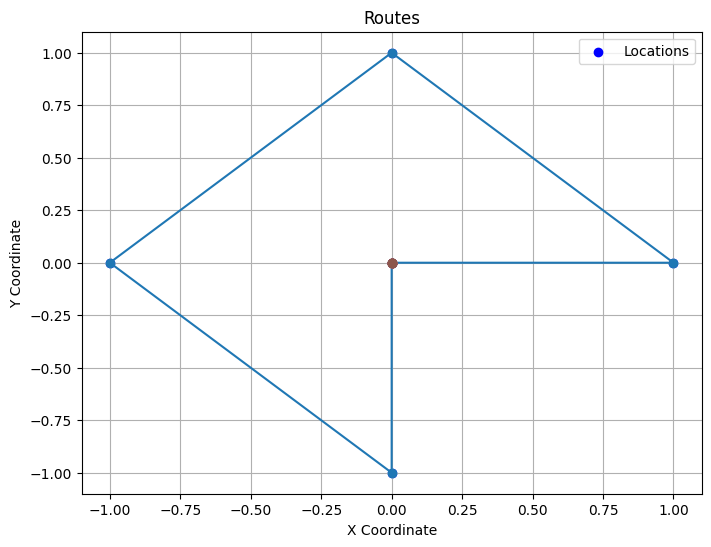

vehicle 1 route: depot ->0 -> 0 -> 1 -> 2 -> 3 -> 4 -> 0 -> depot
Distance for vehicle 1 r_distance=6.242640687119285, Time traveled = 36.23
vehicle 2 route: depot ->0 -> depot
Distance for vehicle 2 r_distance=0.0, Time traveled = 0.0
vehicle 3 route: depot ->0 -> depot
Distance for vehicle 3 r_distance=0.0, Time traveled = 0.0
vehicle 4 route: depot ->0 -> depot
Distance for vehicle 4 r_distance=0.0, Time traveled = 0.0
vehicle 5 route: depot ->0 -> depot
Distance for vehicle 5 r_distance=0.0, Time traveled = 0.0
vehicle 6 route: depot ->0 -> depot
Distance for vehicle 6 r_distance=0.0, Time traveled = 0.0
Total Distance is: 6.242640687119285, Total Time = 36.23


In [161]:
# Print and plot solution
d_sol = discretization(sol,0,MAX_ROUTES-1)
route_assignments = split_into_assigned_routes(d_sol,MAX_ROUTES-1)
# sol = [find_order_for_assignment(r, vrp) for r in route_assignments]

sol = [find_order_for_assignment(route_assignments[r], vrp) for r in route_assignments]

vrp.plot_routes(sol)
vrp.print_routes(sol)